<h1>Übungsaufgabe zu linearer Regression</h1>

Ausgehend von bestehenden Daten zum Pro-Kopf-Einkommen Kanadas von 1970 bis 2016 ist die Aufgabe, die Prognose für das Jahr 2020 zu erstellen.
Dazu nutzen wir die lineare Regression. Das Ergebnis muss lauten: 41288.69409442


<h1>Exercise: Linear regression</h1>

Using existing data on canada's per capita income from 1970 to 2016, the task is to predict the income for 2020.
We use linear regression for this. The result must be: 41288.69409442

Data Source: Kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("canada_per_capita_income.csv")

In [21]:
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


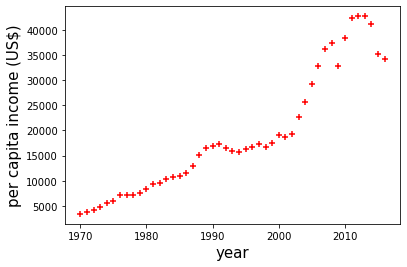

In [5]:
%matplotlib inline
plt.xlabel('year', fontsize=15)
plt.ylabel("per capita income (US$)", fontsize=15)
plt.scatter(df["year"],df["per capita income (US$)"],color='red',marker='+')

In [6]:
X=df[["year"]]
y=df["per capita income (US$)"]

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lm = LinearRegression()

In [9]:
lm.fit(X, y) 

LinearRegression()

In [10]:
print(lm.coef_)

[828.46507522]


In [11]:
print(lm.intercept_)

-1632210.7578554575


In [12]:
y_test=lm.coef_ *2020 + lm.intercept_
print(y_test)

[41288.69409442]


In [13]:
# This is the "correct" result expected for 2020.
#
# Now we plot the regression line.

In [14]:
predictions=lm.predict(X)  

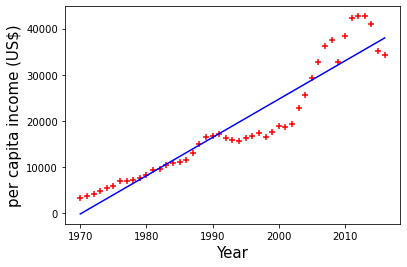

In [15]:
%matplotlib inline
plt.xlabel('Year', fontsize=15)
plt.ylabel('per capita income (US$)', fontsize=15)
plt.scatter(X,y,color='red',marker='+')
plt.plot(X,predictions,color='blue')

In [16]:
# We generate a csv file for the per capita income future years 2017 to 2031

In [17]:
future_income_df = pd.read_csv("canada_income_test.csv", sep=";")
future_income_df.head(5)

,year
0,2017
1,2018
2,2019
3,2020
4,2021


In [18]:
p = lm.predict(future_income_df)
p

array([38803.29886875, 39631.76394397, 40460.22901919, 41288.69409442,
       42117.15916964, 42945.62424486, 43774.08932009, 44602.55439531,
       45431.01947053, 46259.48454575, 47087.94962098, 47916.4146962 ,
       48744.87977142, 49573.34484664, 50401.80992187])

In [19]:
future_income_df["per capita income (US$)"]=p
future_income_df

,year,per capita income (US$)
0,2017,38803.298869
1,2018,39631.763944
2,2019,40460.229019
3,2020,41288.694094
4,2021,42117.159170
5,2022,42945.624245
6,2023,43774.089320
7,2024,44602.554395
8,2025,45431.019471
9,2026,46259.484546


In [20]:
future_income_df.to_csv("income_predict.csv")

In [ ]:
Schritte:
    1. Linear regression erzeugen als objekt: lm = LinearRegression()
    2. Trainieren: model=lm.fit(X_train, y_train) 
    3. Vorghersage mit testdaten: predictions=lm.predict(X_test)  
    4. Validierung bzw. überptüfen mit modell score: model.score(X_test, y_test)